In [ ]:
!pip install keras
!git clone https://github.com/raghakot/keras-vis.git
!sudo python keras-vis/setup.py install

Cloning into 'keras-vis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1669 (delta 0), reused 1 (delta 0), pack-reused 1662
Receiving objects: 100% (1669/1669), 150.19 MiB | 42.03 MiB/s, done.
Resolving deltas: 100% (887/887), done.
running install
running bdist_egg
running egg_info
creating keras_vis.egg-info
writing keras_vis.egg-info/PKG-INFO
writing dependency_links to keras_vis.egg-info/dependency_links.txt
writing requirements to keras_vis.egg-info/requires.txt
writing top-level names to keras_vis.egg-info/top_level.txt
writing manifest file 'keras_vis.egg-info/SOURCES.txt'
reading manifest file 'keras_vis.egg-info/SOURCES.txt'
writing manifest file 'keras_vis.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/E

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

print(tf.test.gpu_device_name())
print("Confirmed GPU usage.")

Using TensorFlow backend.


/device:GPU:0
Confirmed GPU usage.


In [ ]:
import tensorflow_addons as tfa
import numpy as np
from scipy.ndimage import rotate
import random

mnist = keras.datasets.mnist
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
x_tr = keras.utils.normalize(x_tr, axis=1)
x_te = keras.utils.normalize(x_te, axis=1)

training_dataset = 'conventional data augmentation' #@param ["0 degrees", "45 degrees", "random degrees", "conventional data augmentation"]
test_dataset = 'conventional data augmentation' #@param ["0 degrees", "45 degrees", "random degrees", "conventional data augmentation"]

if training_dataset == '45 degrees':
  x_train = np.zeros(x_tr.shape)
  for i in range(len(x_tr)):
    x_train[i] = rotate(x_tr[i], angle=45, reshape=False)
  y_train = y_tr
elif training_dataset == 'random degrees':
  x_train = np.zeros(x_tr.shape)
  rot = random.randint(0, 90)
  for i in range(len(x_tr)):
    x_train[i] = rotate(x_tr[i], angle=rot, reshape=False)
  y_train = y_tr
elif training_dataset == 'conventional data augmentation':
  x_tr_aug = np.zeros(x_tr.shape)
  for i in range(len(x_tr)):
    rot = random.randint(0,90)
    x_tr_aug[i] = rotate(x_tr[i], angle=rot, reshape=False)
  x_train = np.append(x_tr, x_tr_aug, axis=0)
  y_train = np.append(y_tr, y_tr, axis=0)
else:
  x_train = x_tr
  y_train = y_tr

if test_dataset == '45 degrees':
  x_test = np.zeros(x_te.shape)
  for i in range(len(x_te)):
    x_test[i] = rotate(x_te[i], angle=45, reshape=False)
  y_test = y_te
elif test_dataset == 'random degrees':
  x_test = np.zeros(x_te.shape)
  rot = random.randint(0, 90)
  for i in range(len(x_te)):
    x_test[i] = rotate(x_te[i], angle=rot, reshape=False)
  y_test = y_te
elif test_dataset == 'conventional data augmentation':
  x_te_aug = np.zeros(x_te.shape)
  for i in range(len(x_te)):
    rot = random.randint(0,90)
    x_te_aug[i] = rotate(x_te[i], angle=rot, reshape=False)
  x_test = np.append(x_te, x_te_aug, axis=0)
  y_test = np.append(y_te, y_te, axis=0)
else:
  x_test = x_te
  y_test = y_te

11493376/11490434 [==============================] - 1s 0us/step


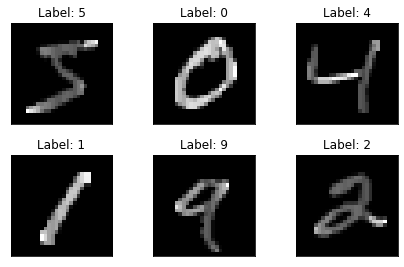

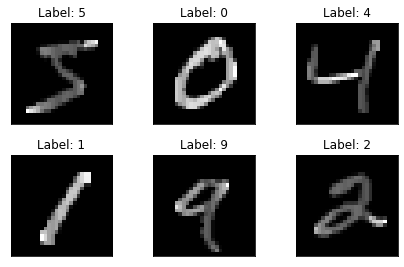

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
120000/120000 [==============================] - 12s 101us/step - loss: 0.3232 - accuracy: 0.9000
Epoch 2/5
120000/120000 [==============================] - 10s 84us/step - loss: 0.1487 - accuracy: 0.9530
Epoch 3/5
120000/120000 [==============================] - 10s 84us/step - loss: 0.1086 - accuracy: 0.9650
Epoch 4/5
120000/120000 [==============================] - 10s 83us/step - loss: 0.0833 - accuracy: 0.9735
Epoch 5/5
120000/120000 [==============================] - 10s 81us/step - loss: 0.0669 - accuracy: 0.9781


20000/20000 [==============================] - 1s 46us/step

Test accuracy:  0.9641000032424927


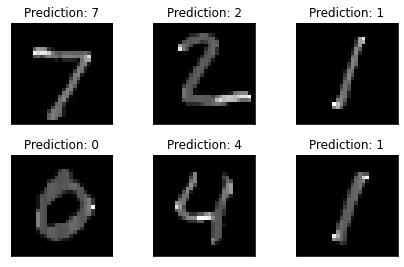

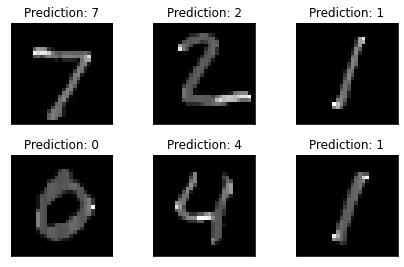

In [ ]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('\nTest accuracy: ', test_acc)

predictions = model.predict(x_test)
fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(x_test[i], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(np.argmax(predictions[i])))
  plt.xticks([])
  plt.yticks([])
fig

Layer 0


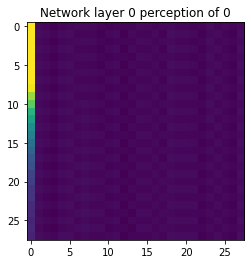

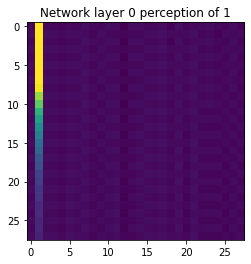

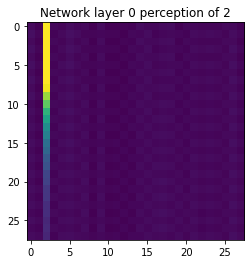

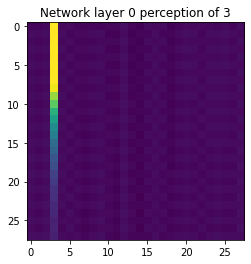

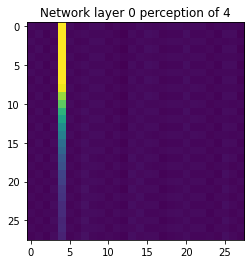

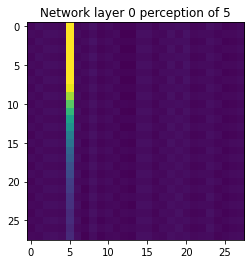

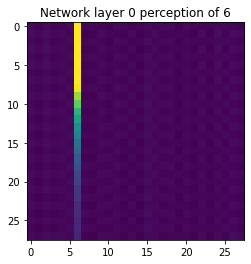

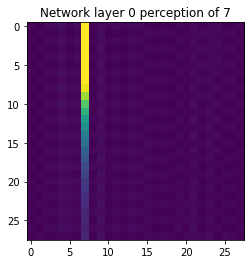

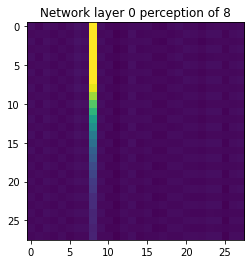

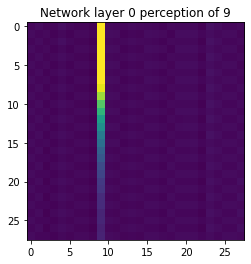

In [ ]:
layer_idx = 0
print('Layer {}'.format(layer_idx))
model.layers[layer_idx].activation = activations.linear
with CustomObjectScope({'softmax_v2': tf.nn.softmax}):
  model = utils.apply_modifications(model)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Network layer {} perception of {}'.format(layer_idx, output_idx))
    plt.imshow(img)

Layer 1


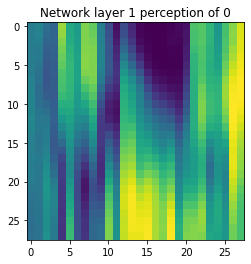

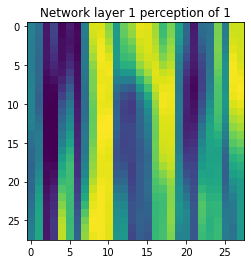

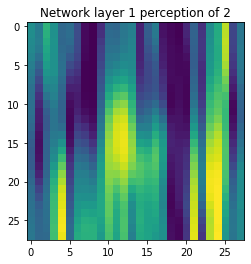

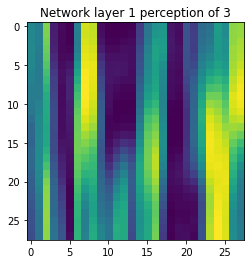

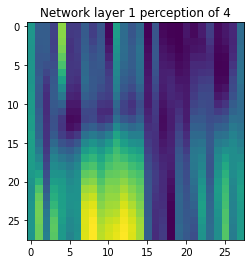

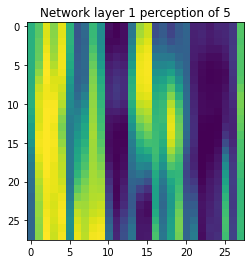

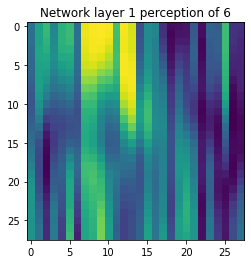

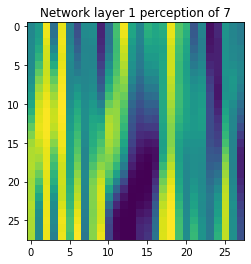

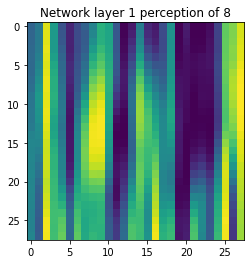

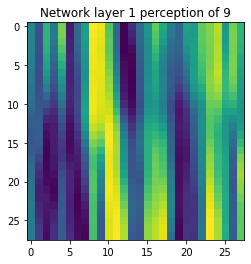

In [ ]:
layer_idx = 1
print('Layer {}'.format(layer_idx))
model.layers[layer_idx].activation = activations.linear
with CustomObjectScope({'softmax_v2': tf.nn.softmax}):
  model = utils.apply_modifications(model)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Network layer {} perception of {}'.format(layer_idx, output_idx))
    plt.imshow(img)

Layer 2


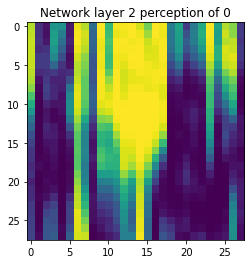

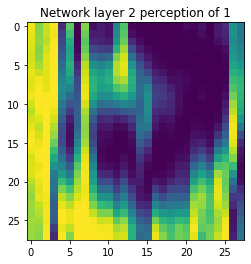

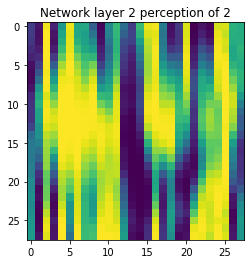

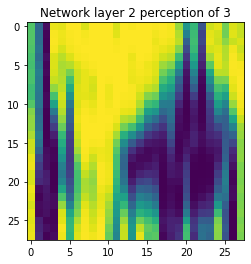

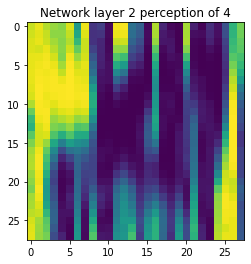

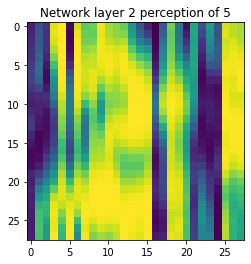

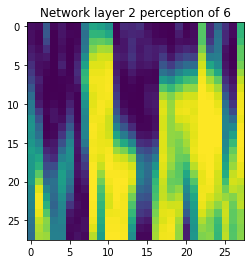

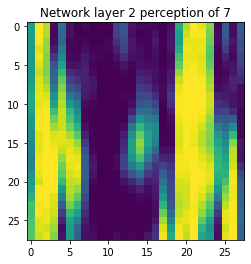

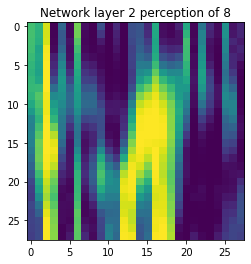

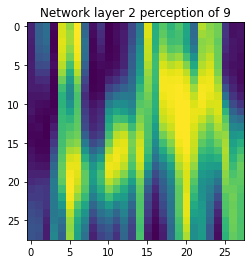

In [ ]:
layer_idx = 2
print('Layer {}'.format(layer_idx))
model.layers[layer_idx].activation = activations.linear
with CustomObjectScope({'softmax_v2': tf.nn.softmax}):
  model = utils.apply_modifications(model)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Network layer {} perception of {}'.format(layer_idx, output_idx))
    plt.imshow(img)

Layer 3


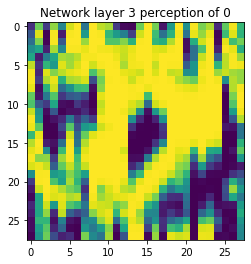

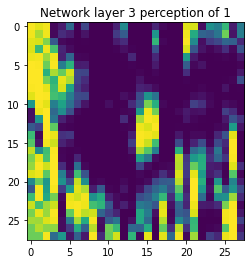

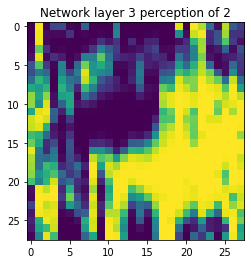

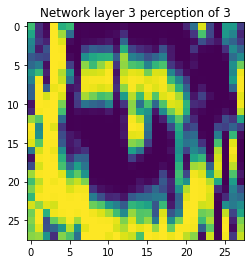

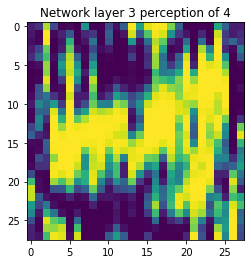

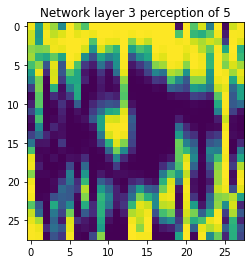

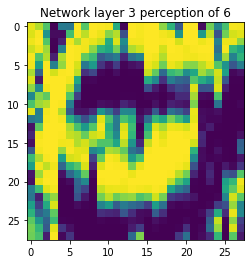

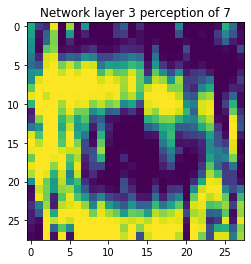

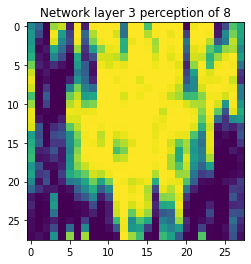

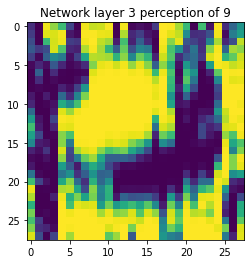

In [ ]:
layer_idx = 3
print('Layer {}'.format(layer_idx))
model.layers[layer_idx].activation = activations.linear
with CustomObjectScope({'softmax_v2': tf.nn.softmax}):
  model = utils.apply_modifications(model)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Network layer {} perception of {}'.format(layer_idx, output_idx))
    plt.imshow(img)